In [1]:
!pip3 install -r requirements.txt

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pytesseract
import easyocr
from pixellib.instance import instance_segmentation
import cv2
from matplotlib import pyplot as plt

Processed image saved successfully in your current working directory.
There are 3 people in this image 


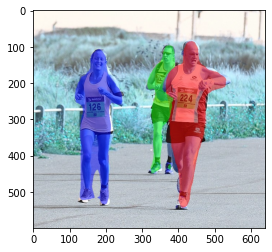

In [6]:
segment_image = instance_segmentation()
segment_image.load_model(
    "/Users/youngsharifullin/Downloads/object_detection_in_an_image-master/mask_rcnn_coco.h5") # здесь прописать путь до файла с обученной сеткой
target_class = segment_image.select_target_classes(person=True) # просим найти только людей 
result = segment_image.segmentImage(
    image_path=f'media/images/640px-Kent_Coastal_Marathon__Half_Marathon_2014_IMG_0861_15197884051.jpg', # здесь прописать файл до изображения 
    segment_target_classes=target_class, # передаем нашу просьбу найти только людей
    extract_segmented_objects=True, # здесь вырезаем с изображения все искомые объекты и сохраняем в отдельные файлы для дальнейшей обработки
    save_extracted_objects=True,
    output_image_name="output.jpg" # просто название выходного файла который ниже посмотрим
)
img = cv2.imread('output.jpg')
plt.imshow(img)
objects_count = len(result[0]["scores"]) # определяем сколько искомых объектов удалось найти
print(f'There are {objects_count} people in this image ')


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Runner`s number:5


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Runner`s number:126
Runner`s number:224


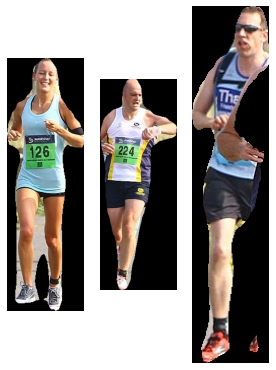

In [5]:
result = []
pic_box = plt.figure(figsize=(8,40)) # область для вывода изображения
for n in range(objects_count): # перебираем найденные изображения
        rec_name = f'segmented_object_{n+1}.jpg'
        picture = cv2.imread(rec_name)
        picture = cv2.cvtColor(picture, cv2.COLOR_BGR2RGB) # конвертируем BGR изображение в RGB
        pic_box.add_subplot(2,5,n+1) # добавляем ячейку в pix_box для вывода текущего изображения
        plt.imshow(picture) # выводим все созданные фигуры на экран
        plt.axis('off') # отключаем отображение осей
        reader = easyocr.Reader(["ru", "en"])
        text = reader.readtext(
            rec_name, detail=0, allowlist='0123456789', paragraph=False) #с помощью easyocr ищем символы с нужнным нам allowlist
        for i in range(len(text)):
            if len(text[i]) < 5: # небольшое условие чтобы отсеять возможность чтения текста в виде букв
                result.append(text[i])
        print(f'Runner`s number:{result[n]}')